# Coding in python – Random Forest

Let’s import the libraries.

In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
# Reading the csv file and putting it into 'df' object
df = pd.read_csv('D:\\Resolve6_Training\\DS_ML\\\Sample Data Sets\\heart_v2.csv')
print(df.head())

   age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0


In [4]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)
# Putting response variable to y
y = df['heart disease']

In [5]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

In [6]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

# Let’s import RandomForestClassifier and fit the data.

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [9]:
%%time
classifier_rf.fit(X_train, y_train)

Wall time: 988 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [9]:
# checking the oob score
classifier_rf.oob_score_

0.656084656084656

# Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

In [10]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [11]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [14]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 1min 8s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [17]:
print(grid_search.best_score_)

0.6985815602836879


In [16]:
rf_best = grid_search.best_estimator_
print(rf_best)

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

From hyperparameter tuning, we can fetch the best estimator as shown. The best set of parameters identified were max_depth=5, min_samples_leaf=10,n_estimators=10

# Now let’s visualize

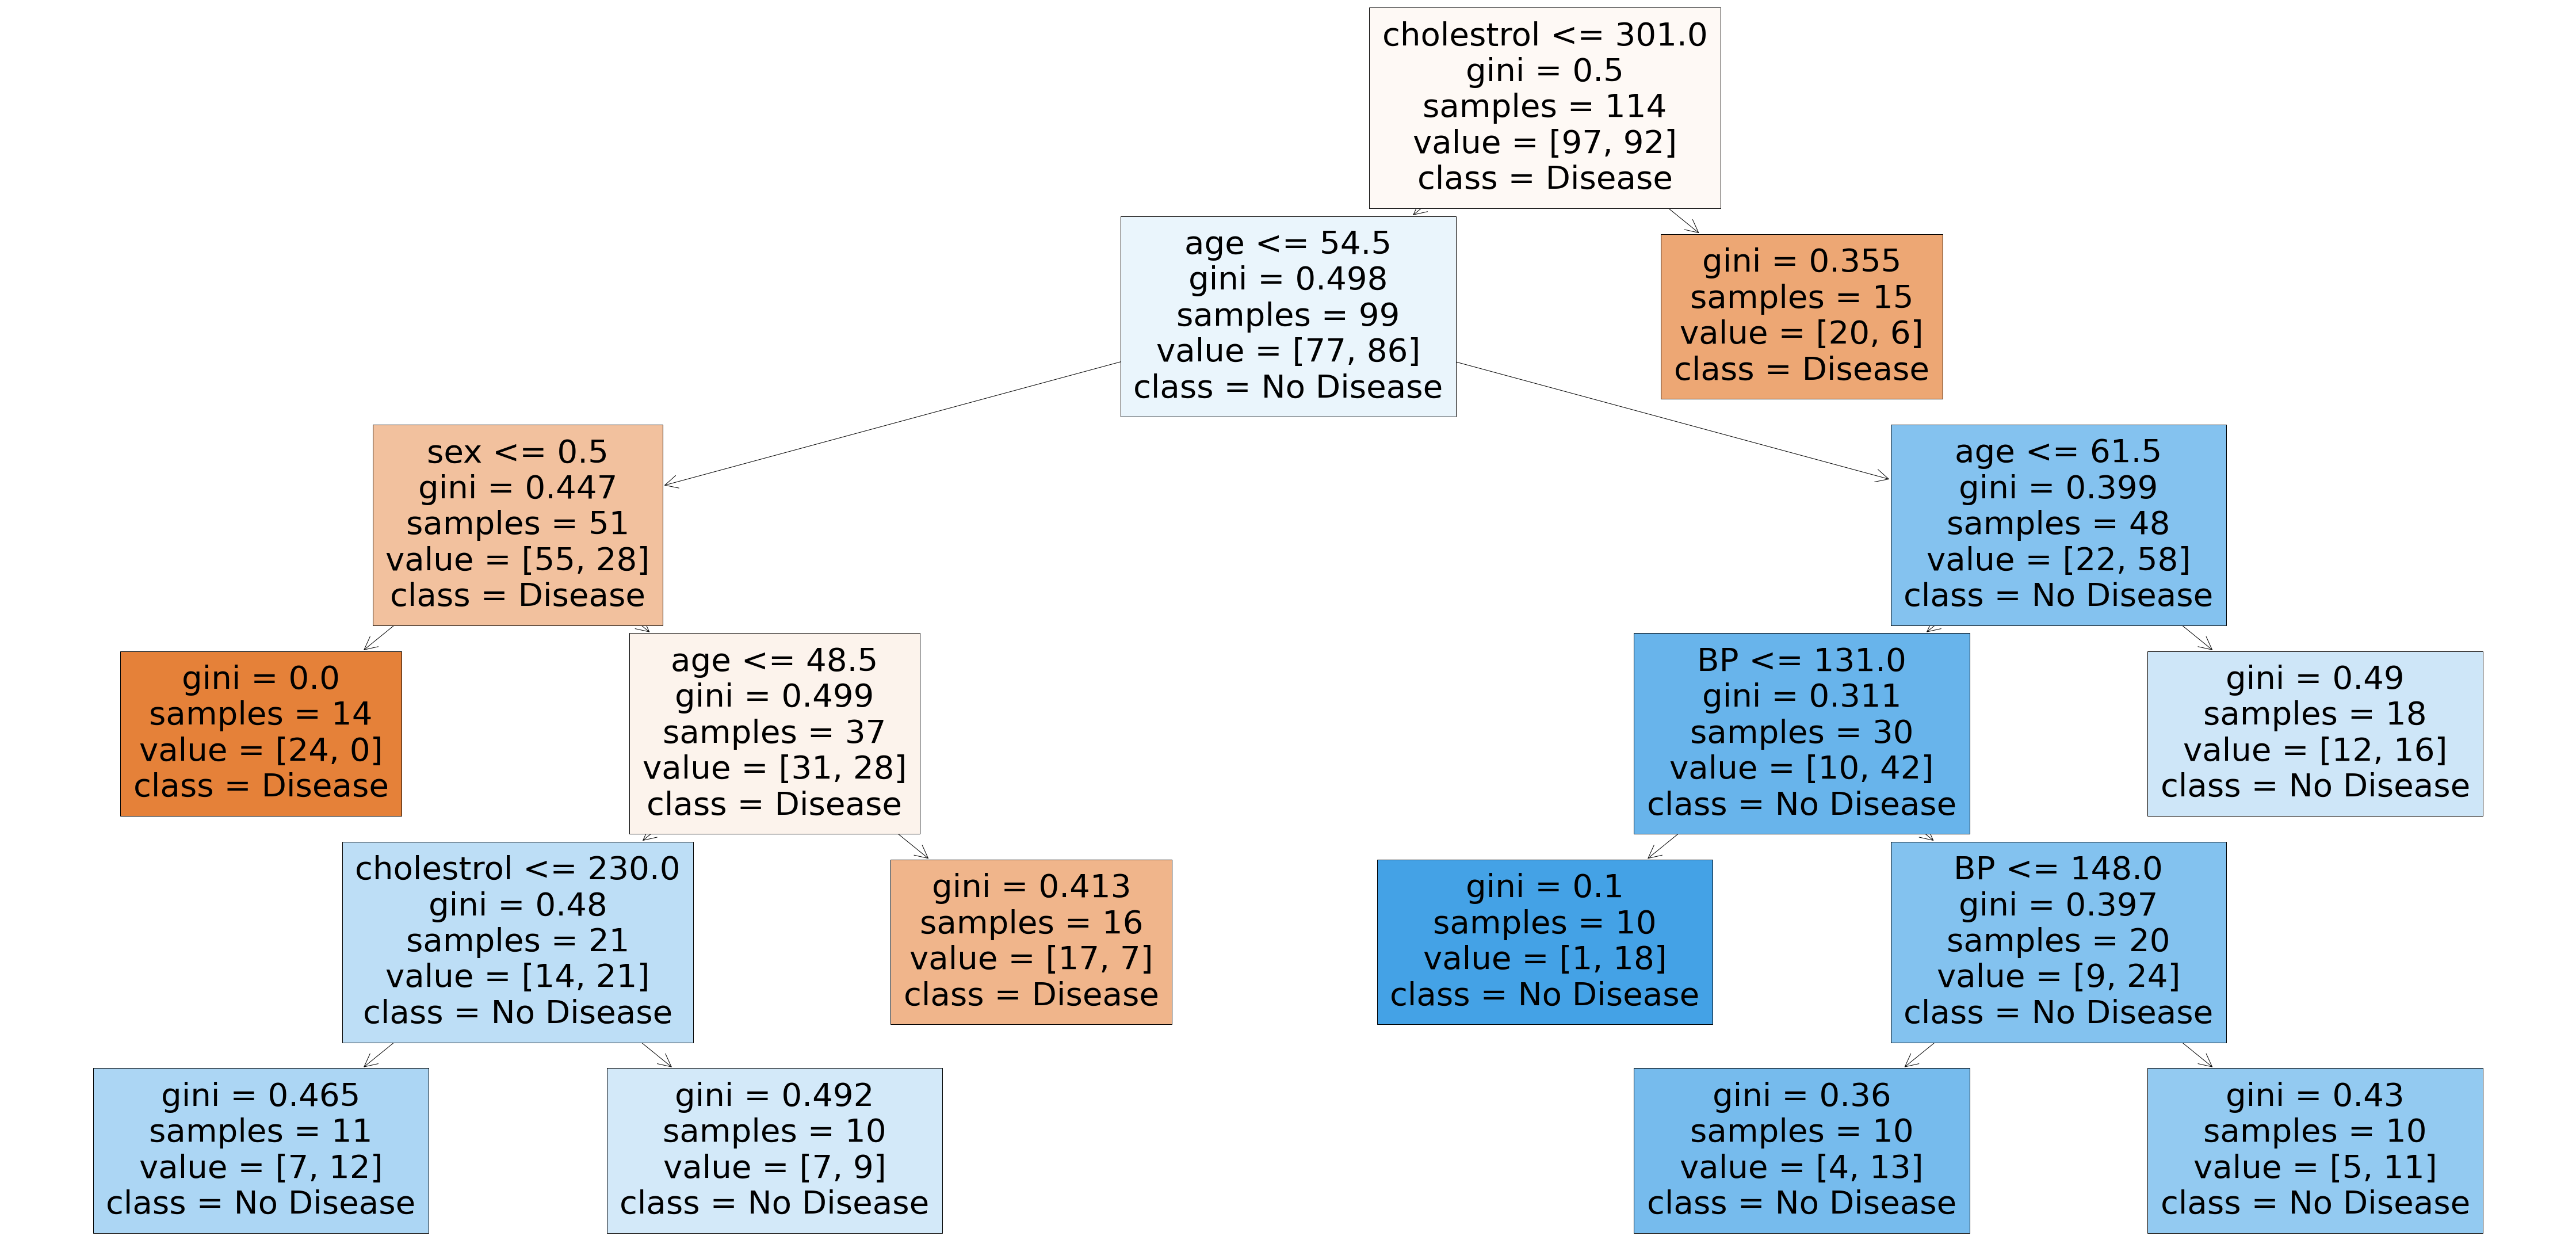

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

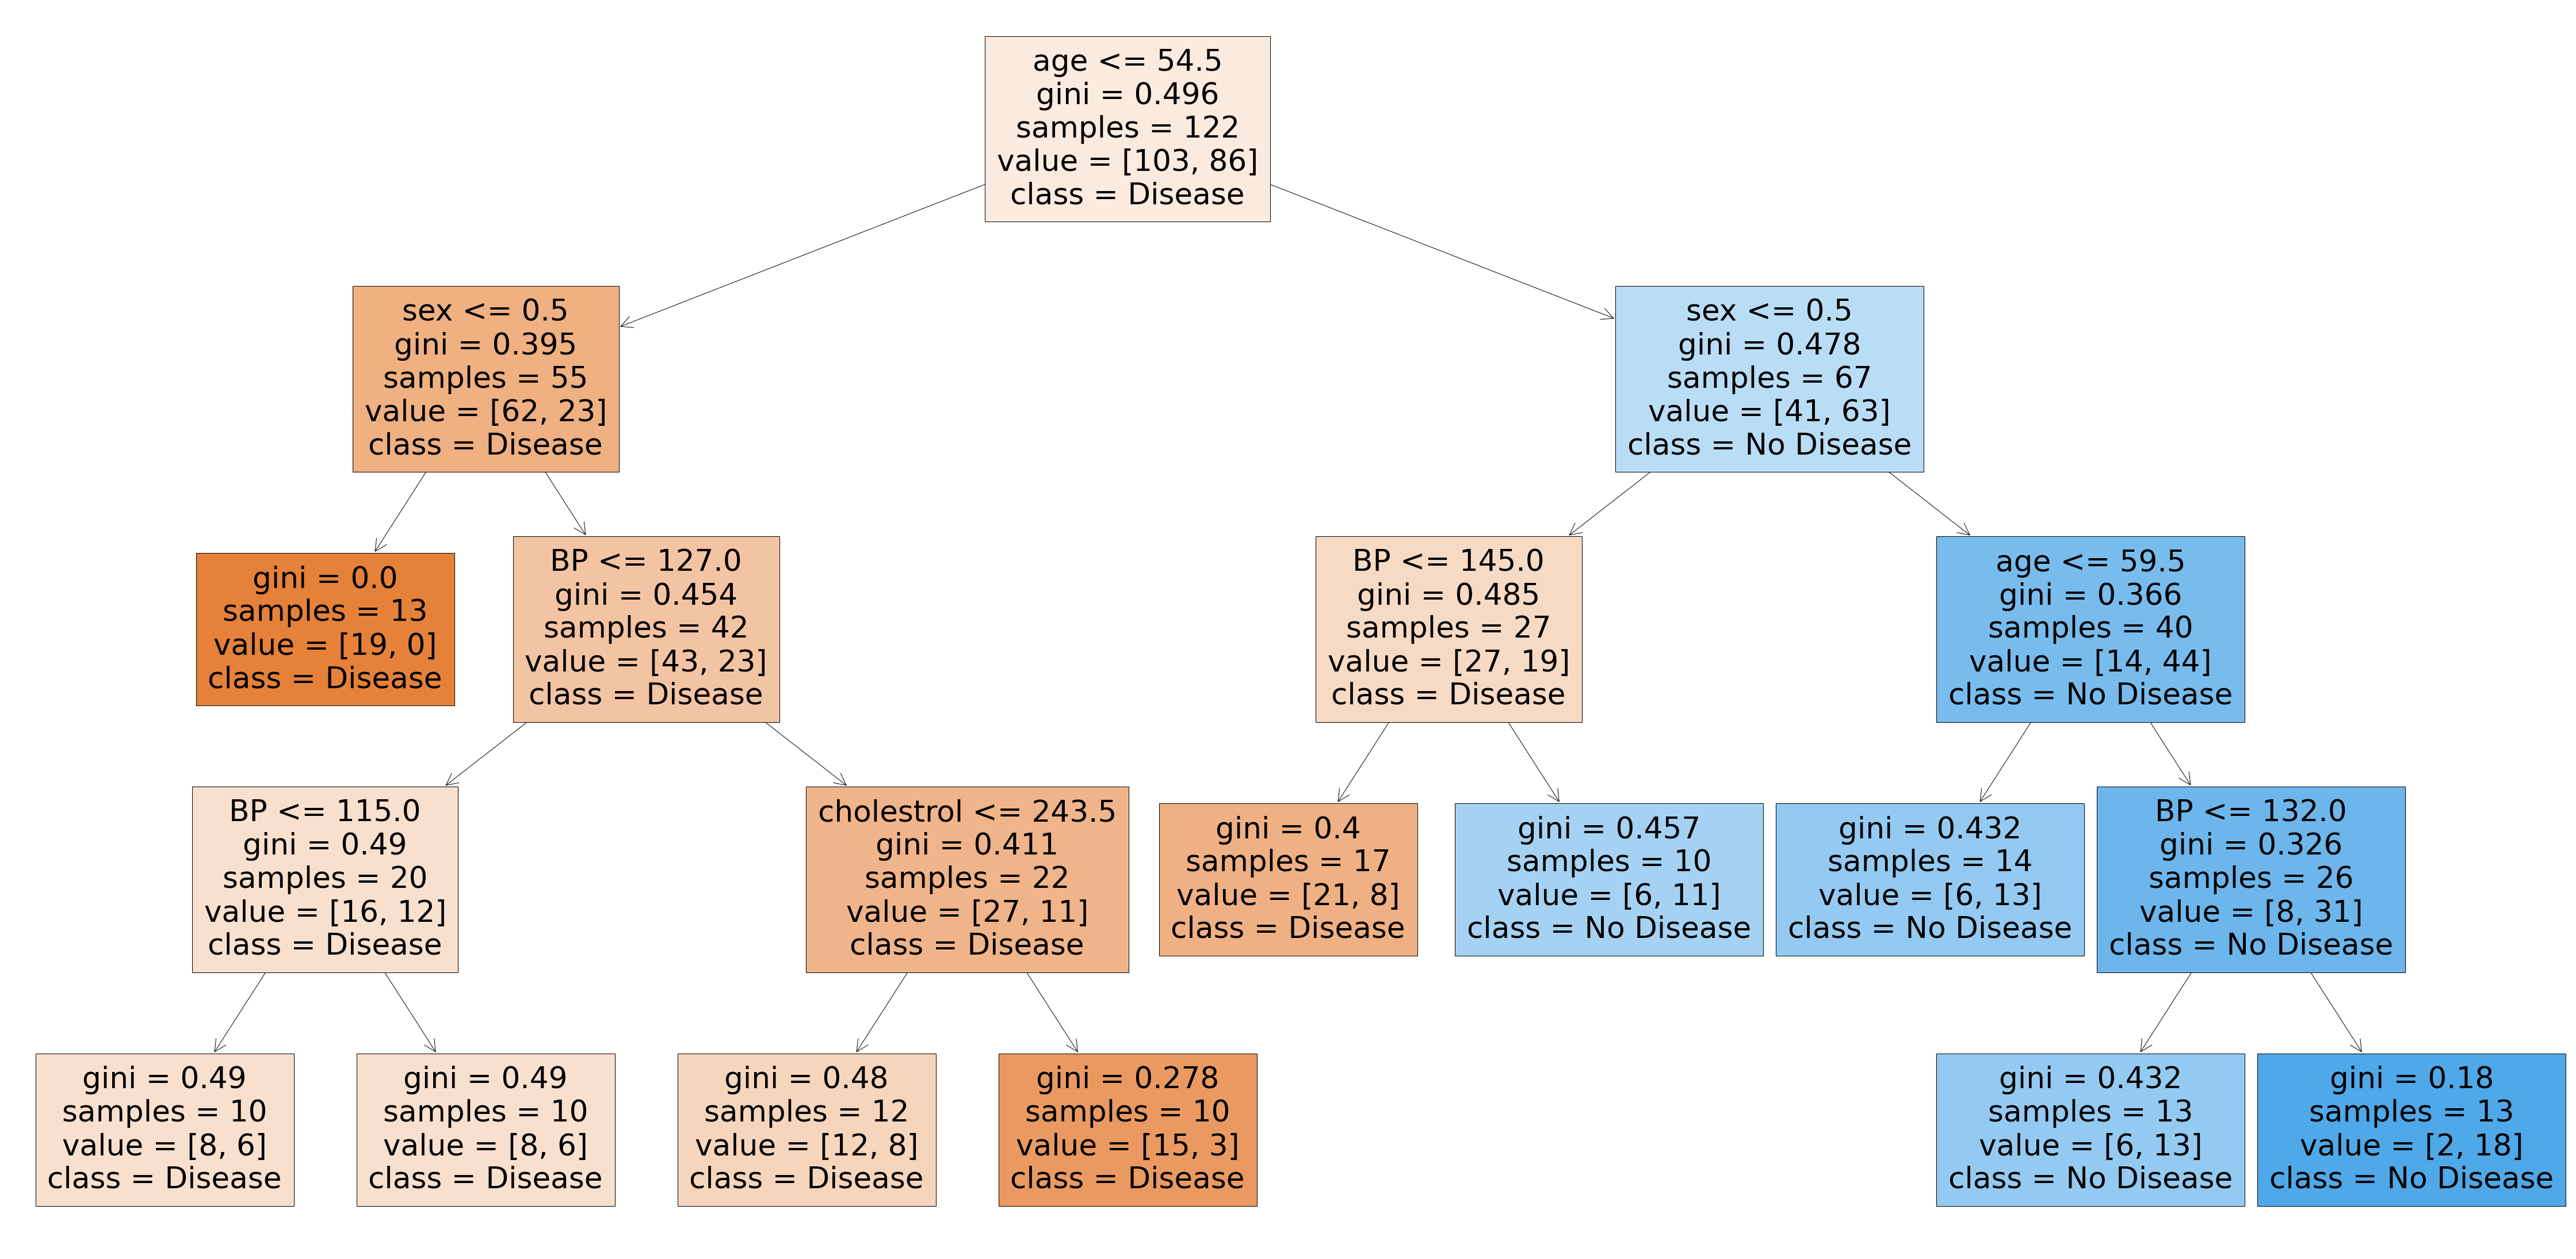

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

let’s sort the data with the help of feature importance

In [20]:
rf_best.feature_importances_

array([0.46128487, 0.2180848 , 0.13174619, 0.18888413])

In [21]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [22]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
0         age  0.461285
1         sex  0.218085
3  cholestrol  0.188884
2          BP  0.131746